Regressão Polinomial:

### Apresente os dados utilizados, descrevendo o objetivo da análise e as variáveis de interesse.

O objetivo é verificar se o crescimento da população do brasil ao longo dos anos de 1970 até 2022 pode ser descrito por uma regressão polinomial. Vamos verificar e resposta para o modelo usando polinômios de grau 2, 3 e 4 e comparar os resultados.

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

O dataset contem informações de vários países e suas populações ao longo do tempo e são apresentados no seguinte formato:

![imagem do dataset](./datasets/vW6J0k9.png)

Carrega o dataset da polulação mundial adquirido no link:
https://www.kaggle.com/datasets/iamsouravbanerjee/world-population-dataset/data

In [248]:
file = "./datasets/world_population.csv"
data = pd.read_csv(file)

Seleciona a população do brasil ao longo dos anos

In [249]:
brazil_population = data[data["Country/Territory"] == "Brazil"]

# Selecionar as colunas de população ao longo dos anos
years = [
    "2022 Population",
    "2020 Population",
    "2015 Population",
    "2010 Population",
    "2000 Population",
    "1990 Population",
    "1980 Population",
    "1970 Population",
]
brazil_population_values_millions = (brazil_population[years].astype(float).values)[0] / 1000000
brazil_population_years = [
    [2022],
    [2020],
    [2015],
    [2010],
    [2000],
    [1990],
    [1980],
    [1970],
]

### Apresente o gráfico de dispersão entre as variáveis dependente e independente;

No gráfico apresentado é possível verificar visualmente que os dados têm uma tendência de diminuição da taxa de crescimento ao longo do tempo e entre os anos de 1970 e 2000 é possível verificar visualmente uma taxa crescimento mais constante.

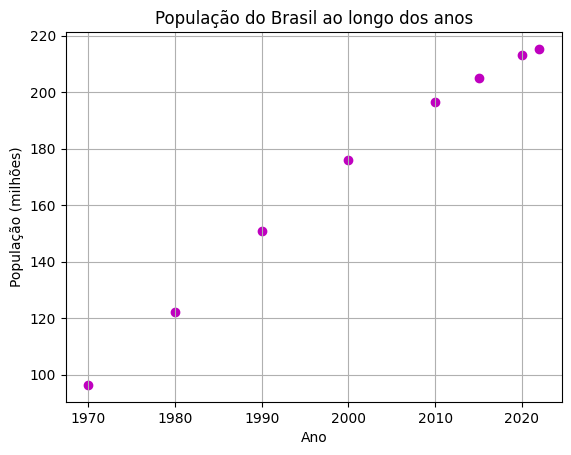

In [250]:
plt.figure()
plt.scatter(
    brazil_population_years, brazil_population_values_millions, marker="o", color="m"
)
plt.title("População do Brasil ao longo dos anos")
plt.xlabel("Ano")
plt.ylabel("População (milhões)")
plt.grid(True)
plt.show()

In [251]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [252]:
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mae, mse, rmse


def print_metrics(r2, mae, mse, rmse):
    print(f"MAE: {mae:.4f}") if mae is not None else None
    print(f"MSE: {mse:.4f}") if mse is not None else None
    print(f"RMSE: {rmse:.4f}") if rmse is not None else None
    print(f"Coeficiente de determinação R²: {r2:.4f}") if r2 is not None else None

In [253]:
def polynomial_regression(years, population, degree):
    # Transformar os dados para incluir termos polinomiais
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(years)

    # Criar o modelo de regressão linear
    regr = LinearRegression()
    regr.fit(x_poly, population)

    # Predizer os valores
    population_pred = regr.predict(x_poly)

    return population_pred

In [254]:
def plot_population(years, population, population_pred, degree, r2):
    # Plot outputs
    plt.scatter(years, population, marker="o", color="m", label="Dados reais")
    plt.plot(
        years,
        population_pred,
        color="c",
        linewidth=1,
        linestyle="-",
        label=f"Regressão Polinomial (Grau {degree})",
    )

    plt.xlabel("Ano")
    plt.ylabel("População (milhões)")
    plt.title("População do Brasil ao longo dos anos")
    plt.grid(True)
    plt.legend()

   # Adicionar o valor de R² sobre a curva de regressão
    plt.annotate(
        f"R² = {r2:.4f}",
        xy=(0.35, 0.65),  # Posição relativa ao gráfico (50% do eixo x, 90% do eixo y)
        xycoords='axes fraction',
        color="c"
    )

    plt.show()

In [255]:
def execute_polynomial_regression(years, population, degree):
    # Realizar a regressão polinomial
    population_pred = polynomial_regression(years, population, degree)

    # Calcular as métricas
    r2, mae, mse, rmse = calculate_metrics(population, population_pred)

    # Imprimir as métricas
    print_metrics(r2, None, None, rmse)

    # Plotar os resultados
    plot_population(years, population, population_pred, degree, r2)

### Considere iniciar o modelo com uma função quadrática e obtenha os parâmetros do modelo. Estime a nova variável dependente. Qual a raiz do erro médio quadrático (RMSE) e o coeficiente de determinação (R-square) obtidos para o modelo estimado nos dados de treinamento e de teste?

RMSE: 3.8734
Coeficiente de determinação R²: 0.9914


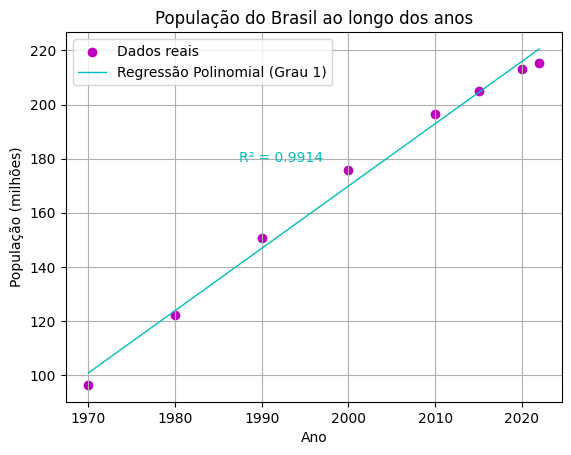

In [256]:
degree = 1 # regressão linear
execute_polynomial_regression(brazil_population_years, brazil_population_values_millions, degree)

RMSE: 1.1478
Coeficiente de determinação R²: 0.9992


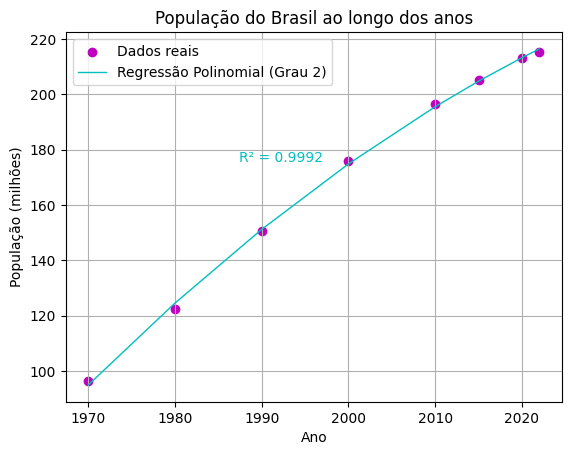

In [257]:
degree = 2
execute_polynomial_regression(brazil_population_years, brazil_population_values_millions, degree)

### Aumente a ordem do modelo (cúbido etc) e obtenha os novos parâmetros do modelo. Estime a nova variável dependente. Qual a raiz do erro médio quadrático (RMSE) e o coeficiente de determinação (R-square) obtidos para o modelo estimado nos dados de treinamento e de teste?

RMSE: 0.4948
Coeficiente de determinação R²: 0.9999


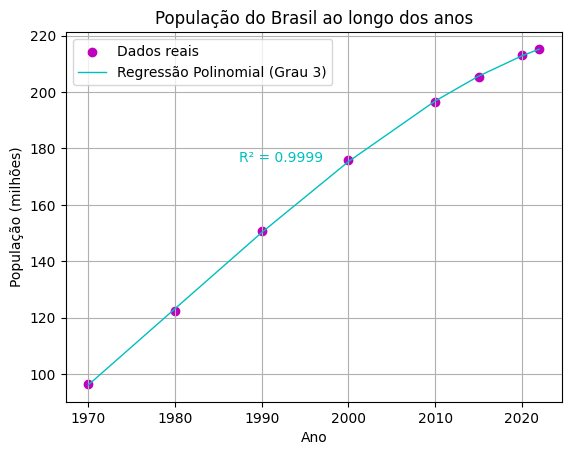

In [258]:
degree = 3
execute_polynomial_regression(brazil_population_years, brazil_population_values_millions, degree)

RMSE: 0.4991
Coeficiente de determinação R²: 0.9999


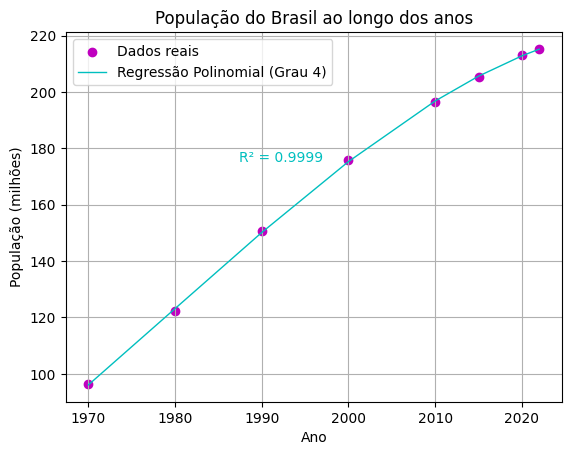

In [259]:
degree = 4
execute_polynomial_regression(brazil_population_years, brazil_population_values_millions, degree)

Primeiramente foi feito uma regressão polinomial de grau 1, que é o mesmo que uma regressão linear, para comparar com as regressões de grau 2, 3 e 4. Como o foco não é a comparação com a regressão linear, vamos apenas comparar a performance das demais regressões.
Observando as curvas de regressão polinomiais de grau 2, 3 e 4 é possível observar uma melhora do grau 2 para 3 quando comparamos de coeficiente de determinação (R²); porém quando aumentamos a ordem de 3 para 4, apesar dos valores semelhantes do coeficiente de determinação, houve uma piora no valor do RMSE, que foi maior para a ordem 4.

Portanto, a regressão polinomial de ordem 3 é a que melhor descreve a população brasileira ao longo dos anos.